### Data Management & Statistical Computing Practical Exercise

---

#### Question 1 <br>
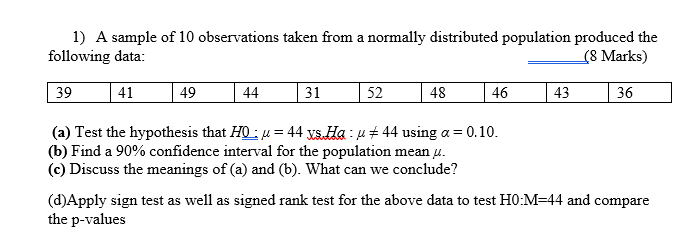

Assumptions satisfied are :
* sample is a simple random sample
* drawn from normally distributed population
* unknown variance

Therefore our test statistic follows t-distribution at $n-1$ degrees of freedom. <br>Test used : one sample t-test

In [1]:
import numpy as np
from scipy import stats
import pandas as pd

#### (a)

In [2]:
sample_1 = np.array([39,41,49,44,31,52,48,46,43,36])
res = stats.ttest_1samp(sample_1,popmean=44,alternative='two-sided')
sample_1 = pd.Series(sample_1)
np.round(sample_1.describe(),2)

count    10.00
mean     42.90
std       6.37
min      31.00
25%      39.50
50%      43.50
75%      47.50
max      52.00
dtype: float64

Summary Stats for one sample t-test
||n|Mean|SD|
|---|---|---|---|
|sample|10|42.90|6.37|

In [3]:
test_stat = res.statistic
p_val = res.pvalue
df = res.df
ci=res.confidence_interval(confidence_level=0.90)

print("test statistic : ",np.round(test_stat,4))
print("p-value : ",np.round(p_val,4))
print("degrees of freedom : ",df)
print("90% confidence interval : ",np.round(ci,2))

test statistic :  -0.5463
p-value :  0.5981
degrees of freedom :  9
90% confidence interval :  [39.21 46.59]


#### (b)

In [4]:
print("90 % confidence interval : ",np.round(ci,4))
print("mean of sample : ",np.mean(sample_1))

90 % confidence interval :  [39.2089 46.5911]
mean of sample :  42.9


Since p-value > 0.10, we fail to reject the null hypothesis. There is no sufficient evidence to prove that the population mean is significantly different from 44.

#### (c) 
From (b) the confidence interval includes the hypothesized value of population mean = 44. This implies we do not reject null hypothesis H0, which is what is implied in (a).

#### (d)

In [5]:
diff = sample_1 - 44
diff = diff[diff!=0]
n_pos = np.sum(diff>0)
n_neg = np.sum(diff<0)
N = n_pos

res = stats.binomtest(N,n_pos+n_neg,0.5,alternative='two-sided')

In [6]:
test_stat = res.statistic
p_val = res.pvalue
ci=res.proportion_ci(confidence_level=0.90)

print("test statistic : ",np.round(test_stat,4))
print("p-value : ",np.round(p_val,4))
print("90 % confidence interval : ",np.round(ci,4))
print("median of sample : ",np.median(sample_1))
print(res)

test statistic :  0.4444
p-value :  1.0
90 % confidence interval :  [0.1688 0.7486]
median of sample :  43.5
BinomTestResult(k=4, n=9, alternative='two-sided', statistic=0.4444444444444444, pvalue=1.0)


p-value under sign test = 0.7539

p-value under wilcoxon signed rank test = 0.7218 which is less than that under sign test. <br>
* Therefore wilcoxon signed rank test provides stronger evidence in favor of null hypothesis at 0.10 level of significance.
* We fail to reject the null hypothesis at 0.10 level of significance.
* power of t-test > power of signed rank test > power of sign test, since sign test uses least information.

---

#### Question 2
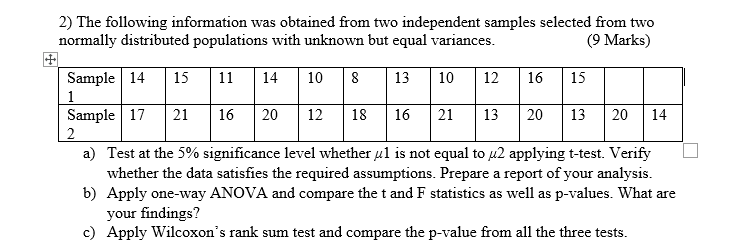

Assumptions satisfied are :
* samples are independent and simple random random samples
* drawn from 2 normally distributed populations
* unknown but equal variances

Therefore our test statistic follows t-distribution at $n_1+n_2-1$ degrees of freedom with pooled estimate of sample variances. <br>Test used : t-test for equal population variances

#### (a)

In [7]:
x1 = np.array([14,15,11,14,10,8,13,10,12,16,15])
x2 = np.array([17,21,16,20,12,18,16,21,13,20,13,20,14])
res = stats.ttest_ind(x1,x2,equal_var=True,alternative='two-sided')

test_stat = res.statistic
p_val = res.pvalue
df = res.df
ci=res.confidence_interval(confidence_level=0.95)

print("test statistic : ",np.round(test_stat,4))
print("p-value : ",np.round(p_val,4))
print("degrees of freedom : ",df)
print("95 % confidence interval : ",np.round(ci,4))
print("mean of sample 1: ",np.round(np.mean(x1),2),"\tmean of sample 2 :",np.round(np.mean(x2),2))
print("difference in mean values : ",np.round(np.mean(x1)-np.mean(x2),2))

test statistic :  -3.6737
p-value :  0.0013
degrees of freedom :  22.0
95 % confidence interval :  [-6.9692 -1.9399]
mean of sample 1:  12.55 	mean of sample 2 : 17.0
difference in mean values :  -4.45


p-value = 0.001 < 0.05. Therefore we reject the null hypothesis. there is significant difference between between the population means.

#### (b)

In [8]:
res = stats.f_oneway(x1,x2)

test_stat = res.statistic
p_val = res.pvalue
print("test_statistic : ",np.round(test_stat,4))
print("p-value : ",np.round(p_val,4))

test_statistic :  13.4962
p-value :  0.0013


In [9]:
(-3.6737)**2

13.49607169

t-statistic = -3.6737 vs F-statistic = 13.496

therefore , $F-statistic = (t-statistic)^{2}$

F (1,22) = 4.30095 and F-statistic = 13.496

p-value under t-test : 0.001332 vs p-value under ANOVA = 0.001332. <br> Both the tests have same level of evidence against the null hypothesis. we reject the null hypothesis at 0.05 level of significance.

#### One way ANOVA through Simple Linear Regression

In [10]:
np.concatenate((x1,x2),axis=0)

array([14, 15, 11, 14, 10,  8, 13, 10, 12, 16, 15, 17, 21, 16, 20, 12, 18,
       16, 21, 13, 20, 13, 20, 14])

In [11]:
import pandas as pd
from itertools import repeat
l1 = list(repeat("x1",len(x1)))
l2 = list(repeat("x2",len(x2)))
np.concatenate((np.array(l1),np.array(l2)),axis=0)

dt = pd.DataFrame({
    'y':np.concatenate((x1,x2),axis=0),
    'data':np.concatenate((np.array(l1),np.array(l2)),axis=0)
}
    )
print(dt.head(),"\n")
print(dt.info())

    y data
0  14   x1
1  15   x1
2  11   x1
3  14   x1
4  10   x1 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   y       24 non-null     int64 
 1   data    24 non-null     object
dtypes: int64(1), object(1)
memory usage: 516.0+ bytes
None


In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols("y~C(data)",data=dt).fit()
aov_table = sm.stats.anova_lm(model,typ=2)

aov_table['Mean_Sq'] = aov_table['sum_sq']/aov_table['df']
aov_table.rename(columns={'sum_sq':'Sum Sq','df':'Df','F':'F value','PR(>F)':'Pr(>F)','Mean_Sq':'Mean Sq'},inplace=True)
aov_table =aov_table[['Df','Sum Sq','Mean Sq','F value','Pr(>F)']]
aov_table.loc[:,'Sum Sq':] = np.round(aov_table.loc[:,'Sum Sq':],4)
aov_table['Df'] = aov_table['Df'].astype('int')

aov_table

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
C(data),1,118.2311,118.2311,13.4962,0.0013
Residual,22,192.7273,8.7603,NaN,NaN


Residual sum of squares corresponds to within sum of squares <br>
whereas C(data) sum of squares (regression sum of squares) corresponds to between sum of squares <br>
Here the response variable is the combined sample value from 2 independent samples <br>
and we have one regressor name "data" which is categorical and dichotomous.

#### (c)

In [13]:
res = stats.mannwhitneyu(x1,x2,alternative='two-sided',method='exact')

In [14]:
p_val = res.pvalue
test_stat = res.statistic

print("test statistic : ",np.round(test_stat,4))
print("p-value : ",np.round(p_val,4))

test statistic :  22.5
p-value :  0.0039


* p-value of wilcoxon rank sum test : 0.004769
* p-value under t-test : 0.001332 = p-value under ANOVA <br>
Therefore one-way ANOVA or two sample t-test give stronger evidence to reject null hypothesis  compared to wilcoxon ranked sum test.

In [15]:
x1 = pd.Series(x1)
np.round(x1.describe(),2)

count    11.00
mean     12.55
std       2.54
min       8.00
25%      10.50
50%      13.00
75%      14.50
max      16.00
dtype: float64

In [16]:
x2 = pd.Series(x2)
np.round(x2.describe(),2)

count    13.00
mean     17.00
std       3.27
min      12.00
25%      14.00
50%      17.00
75%      20.00
max      21.00
dtype: float64

Summary stats for t-test and ANOVA one way F-test
||n|Mean|SD|
|---|---|---|---|
|sample 1|11|12.55|2.54|
|sample 2|13|17.00|3.27|

Summary stats for wilcoxon ranked sum test
||n|Q1|Q2|Q3|min|max|
|---|---|---|---|---|---|---|
|sample 1|11|10.50|13.00|14.50|6.00|16.00|
|sample 2|13|14.00|17.00|20.00|12.00|21.00|

---

### Question 3

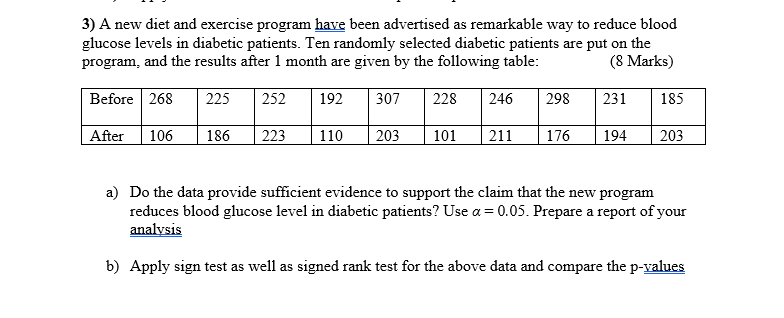

In [17]:
before = np.array([268,225,252,192,307,228,246,298,231,185])
after = np.array([106,186,223,110,203,101,211,176,194,203])
res = stats.ttest_rel(before,after,alternative='greater')

In [18]:
test_stat = res.statistic
p_val = res.pvalue
df = res.df
ci = res.confidence_interval(confidence_level=0.95)

print("test statistic : ",np.round(test_stat,4))
print("p value : ",np.round(p_val,4))
print("degrees of freedom : ",df)
print("95% confidence interval : ",np.round(ci,4))
print("mean difference : ",np.round(np.mean(before-after),2))

test statistic :  4.0489
p value :  0.0014
degrees of freedom :  9
95% confidence interval :  [39.3477     inf]
mean difference :  71.9


Since p-value <= 0.05 , we reject the null hypothesis $H_{0} : d <= 0 $, and conclude that the new program reduces blood glucose level in diabetic patients. (where $d$ = before-after)

In [19]:
before = pd.Series(before)
after = pd.Series(after)
diff = before-after
print(before.describe(),"\n")
print(after.describe(),"\n")
print(diff.describe())

count     10.000000
mean     243.200000
std       40.129789
min      185.000000
25%      225.750000
50%      238.500000
75%      264.000000
max      307.000000
dtype: float64 

count     10.000000
mean     171.300000
std       47.112277
min      101.000000
25%      126.500000
50%      190.000000
75%      203.000000
max      223.000000
dtype: float64 

count     10.000000
mean      71.900000
std       56.155439
min      -18.000000
25%       35.500000
50%       60.500000
75%      117.500000
max      162.000000
dtype: float64


Summary Stats for paired t-test
||n|mean|sd|
|---|---|---|---|
|before|10|243.20|40.13|
|after|10|171.30|47.11|
|difference|10|71.90|56.15|

#### (b)
Summary Stats for wilcoxon signed rank and sign test
||n|Q1|Q2|Q3|min|max|
|---|---|---|---|---|---|---|
|before|10|225.75|238.50|264.00|185.00|307.00|
|after|10|126.50|190.00|203.00|101.00|223.00|
|difference|10|35.50|60.50|117.50|-18.00|162.00|000000000000

#### using sign_test from statsmodels 

In [20]:
import statsmodels.stats.descriptivestats as sd
diff = before-after
diff = diff[diff!=0]
res = sd.sign_test(before,after)
print("test statistic : ",res[0]) # N/ (n_pos + n_neg)
print("p-value : " ,np.round(res[1],5))

test statistic :  4.0
p-value :  0.02148


#### using stats.binomtest

In [21]:
n_pos = np.sum(diff>0)
n_neg = np.sum(diff<0)
N=n_pos
stats.binomtest(N,n_pos+n_neg,0.5,alternative='greater')

BinomTestResult(k=9, n=10, alternative='greater', statistic=0.9, pvalue=0.0107421875)

#### using stats.wilcoxon

In [22]:
diff = before-after
diff = diff[diff!=0]
res = stats.wilcoxon(diff,alternative='greater')
test_stat = res.statistic
p_val = res.pvalue

print("test statistic : ",np.round(test_stat,4))
print("p value : ",np.round(p_val,5))
print("median difference : ",np.round(np.median(before-after),2))

test statistic :  54.0
p value :  0.00195
median difference :  60.5


* p-value by sign test = 0.02148 > p-value by wilcoxon signed rank test = 0.00195
* therefore wilcoxon signed ranked test has stronger evidence against the null hypothesis.
* we reject the null hypothesis that difference in medians is less than or equal to zero and conclude that glucose level of diabetic patients has decreased.
* the median difference between 2 groups is 60.5.

#### Question 4


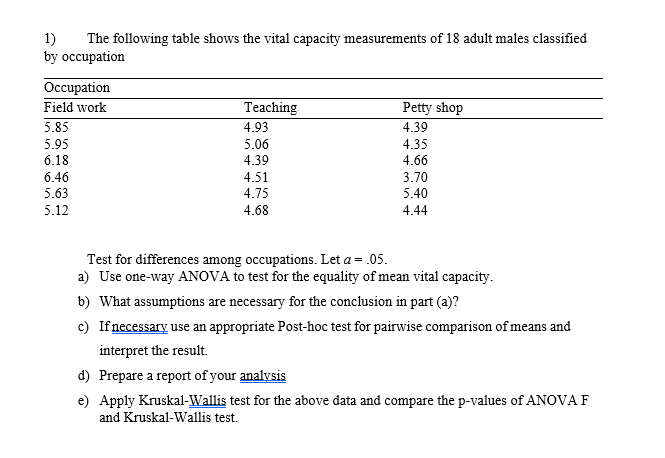

In [23]:
field_work = np.array([5.85,5.95,6.18,6.46,5.63,5.12])
teaching = np.array([4.93,5.06,4.39,4.51,4.75,4.68])
petty_shop = np.array([4.39,4.35,4.66,3.70,5.40,4.44])

import pandas as pd
from itertools import repeat
l1 = list(repeat("field_work",len(field_work)))
l2 = list(repeat("teaching",len(teaching)))
l3 = list(repeat("petty_shop",len(petty_shop)))
np.concatenate((np.array(l1),np.array(l2),np.array(l3)),axis=0)

dt = pd.DataFrame({
    'y':np.concatenate((field_work,teaching,petty_shop),axis=0),
    'data':np.concatenate((np.array(l1),np.array(l2),np.array(l3)),axis=0)
}
    )
print(dt.head(),"\n")
print(dt.info())

      y        data
0  5.85  field_work
1  5.95  field_work
2  6.18  field_work
3  6.46  field_work
4  5.63  field_work 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       18 non-null     float64
 1   data    18 non-null     object 
dtypes: float64(1), object(1)
memory usage: 420.0+ bytes
None


In [24]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("y~C(data)",data=dt).fit()
aov_table = sm.stats.anova_lm(model,typ=2)

aov_table['Mean_Sq'] = aov_table['sum_sq']/aov_table['df']
aov_table.rename(columns={'sum_sq':'Sum Sq','df':'Df','F':'F value','PR(>F)':'Pr(>F)','Mean_Sq':'Mean Sq'},inplace=True)
aov_table =aov_table[['Df','Sum Sq','Mean Sq','F value','Pr(>F)']]
aov_table.loc[:,'Sum Sq':] = np.round(aov_table.loc[:,'Sum Sq':],4)
aov_table['Df'] = aov_table['Df'].astype('int')

aov_table

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
C(data),2,6.5091,3.2545,16.8377,0.0001
Residual,15,2.8993,0.1933,NaN,NaN


#### (b)
* samples are independent of each other
* samples are randomly sampled or randomly assigned to each treatment
* population variances are homogeneous
* population distribution of dependent variable in each group is normal in shape

#### (c)

In [67]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(dt['y'], dt['data'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, alpha=0.05,method= "bonf")
tbl


group1,group2,stat,pval,pval_corr,reject
field_work,petty_shop,4.6849,0.0009,0.0026,True
field_work,teaching,5.3267,0.0003,0.001,True
petty_shop,teaching,-0.9317,0.3735,1.0,False


In [70]:
res = stats.ttest_ind(petty_shop,field_work,equal_var=True,alternative='two-sided')
ci = res.confidence_interval(confidence_level=0.983)
p1 = res.pvalue
np.round(ci,4)

array([-2.214, -0.536])

In [69]:
res = stats.ttest_ind(teaching,field_work,equal_var=True,alternative='two-sided')
ci = res.confidence_interval(confidence_level=0.983)
p2 = res.pvalue
np.round(ci,4)

array([-1.7594, -0.5306])

In [68]:
res = stats.ttest_ind(teaching,petty_shop,equal_var=True,alternative='two-sided')
ci = res.confidence_interval(confidence_level=0.983)
p3 = res.pvalue
np.round(ci,4)

array([-0.4757,  0.9357])

compute confidence intervals for above test

In [66]:
result = stats.kruskal(field_work,petty_shop,teaching)

test_stat = result.statistic
p_val = result.pvalue

print("test statistic : ",np.round(test_stat,4))
print("p-value : ",np.round(p_val,4))

test statistic :  11.506
p-value :  0.0032


* p-value for ANOVA : 0.000147
* p-value for Kruskal-Wallis : 0.003173
* we reject the null hypothesis of equality between medians of 3 populations. atleast one of them differs from the other 2.
* p-value of ANOVA is less than that of Kruskal_Wallis. Therefore ANOVA has stronger evidence for rejecting the null hypothesis of equality of means of populations